In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
len(df_train)

8693

In [6]:
len(df_test)

4277

In [7]:
df_train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

# Remove Unwanted Columns 

In [8]:
df_train.pop('Name')
df_test.pop('Name')
df_train.pop('PassengerId')
df_test.pop('PassengerId')

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [9]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [10]:
df_test.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

# Check for Uniques for OHE 

In [11]:
uniques = {key:(df_train[key].nunique())  for (key,value) in df_train.items()}

In [12]:
uniques

{'HomePlanet': 3,
 'CryoSleep': 2,
 'Cabin': 6560,
 'Destination': 3,
 'Age': 80,
 'VIP': 2,
 'RoomService': 1273,
 'FoodCourt': 1507,
 'ShoppingMall': 1115,
 'Spa': 1327,
 'VRDeck': 1306,
 'Transported': 2}

In [13]:
lst = []
for i,j in uniques.items():
    if(j>2 and j<=3):
        lst.append(i)

In [14]:
lst

['HomePlanet', 'Destination']

In [15]:
df_train = pd.get_dummies(df_train, columns = lst)
df_test = pd.get_dummies(df_test, columns = lst)

In [16]:
df_train.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


In [17]:
df_test.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


# Cleaning

In [18]:
df_train.columns

Index(['CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [19]:
df_train = df_train.loc[:,['CryoSleep', 'VIP', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Transported']]

In [20]:
df_test = df_test.loc[:,['CryoSleep', 'VIP', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']]

In [21]:
df_test.columns

Index(['CryoSleep', 'VIP', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [22]:
df_train.rename(columns = {'HomePlanet_Earth':'HomePlanet_1', 'HomePlanet_Europa':'HomePlanet_2', 'HomePlanet_Mars':'HomePlanet_3', 
                           'Destination_55 Cancri e':'Destination_1','Destination_PSO J318.5-22':'Destination_2', 'Destination_TRAPPIST-1e':'Destination_3'},inplace = True)

df_test.rename(columns = {'HomePlanet_Earth':'HomePlanet_1', 'HomePlanet_Europa':'HomePlanet_2', 'HomePlanet_Mars':'HomePlanet_3', 
                          'Destination_55 Cancri e':'Destination_1','Destination_PSO J318.5-22':'Destination_2', 'Destination_TRAPPIST-1e':'Destination_3'},inplace = True)

In [23]:
df_train.head()

,CryoSleep,VIP,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3,Transported
0,False,False,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,False
1,False,False,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,True
2,False,True,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,False
3,False,False,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,False
4,False,False,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,True


In [24]:
len(df_test)

4277

In [25]:
df_test.tail()

,CryoSleep,VIP,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
4272,True,False,G/1496/S,34.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
4273,False,False,NaN,42.0,0.0,847.0,17.0,10.0,144.0,1,0,0,0,0,1
4274,True,False,D/296/P,NaN,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0
4275,False,False,D/297/P,NaN,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,0,0
4276,True,False,G/1498/S,43.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0


In [26]:
df_train['Cabin'].nunique()

6560

In [27]:
df_train.pop('Cabin')
df_test.pop('Cabin')

0          G/3/S
1          F/4/S
2          C/0/S
3          C/1/S
4          F/5/S
          ...   
4272    G/1496/S
4273         NaN
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 4277, dtype: object

In [28]:
df_train.head()

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3,Transported
0,False,False,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,False
1,False,False,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,True
2,False,True,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,False
3,False,False,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,False
4,False,False,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,True


In [29]:
df_test.head()

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
0,True,False,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,False,False,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,True,False,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,False,False,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,False,False,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


# NaN Handling 

In [30]:
NaN_train = [j for i,(j,k) in enumerate(df_train.isna().any().items()) if k == True]

In [31]:
NaN_test = [j for i,(j,k) in enumerate(df_test.isna().any().items()) if k == True]

In [32]:
nanDtypes_train = {}

for i,j in enumerate(NaN_train):
    nanDtypes_train[j] = df_train[j].dtypes

In [33]:
nanDtypes_train

{'CryoSleep': dtype('O'),
 'VIP': dtype('O'),
 'Age': dtype('float64'),
 'RoomService': dtype('float64'),
 'FoodCourt': dtype('float64'),
 'ShoppingMall': dtype('float64'),
 'Spa': dtype('float64'),
 'VRDeck': dtype('float64')}

In [34]:
df_train = df_train.interpolate(method = 'pad')

In [35]:
df_test = df_test.interpolate(method = 'pad')

In [36]:
df_train.head()

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3,Transported
0,False,False,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,False
1,False,False,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,True
2,False,True,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,False
3,False,False,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,False
4,False,False,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,True


In [37]:
df_test.head()

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
0,True,False,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,False,False,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,True,False,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,False,False,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,False,False,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


In [38]:
df_train.isna().any()

CryoSleep        False
VIP              False
Age              False
RoomService      False
FoodCourt        False
ShoppingMall     False
Spa              False
VRDeck           False
HomePlanet_1     False
HomePlanet_2     False
HomePlanet_3     False
Destination_1    False
Destination_2    False
Destination_3    False
Transported      False
dtype: bool

In [39]:
def func(i):
    return int(i)

df_train['CryoSleep'] = df_train['CryoSleep'].apply(func)
df_test['CryoSleep'] = df_test['CryoSleep'].apply(func)

df_train['VIP'] = df_train['VIP'].apply(func)
df_test['VIP'] = df_test['VIP'].apply(func)

In [40]:
df_train.head()

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3,Transported
0,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,False
1,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,True
2,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,False
3,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,False
4,0,0,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,True


In [41]:
df_test.head()

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
0,1,0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,0,0,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,1,0,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,0,0,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,0,0,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


# Feature Engineering 

total_exp = np.sum((df_train.loc[:,'RoomService':'VRDeck']), axis = 1)

df_train.pop('ShoppingMall')
df_train.pop('Spa')
df_train.pop('VRDeck')
df_train.pop('RoomService')
df_train.pop('FoodCourt')

df_train.insert(2, 'TotalExpense', total_exp)

df_train.head()

total_exp = np.sum((df_test.loc[:,'RoomService':'VRDeck']), axis = 1)
df_test.insert(2, 'TotalExpense', total_exp)

df_test.pop('ShoppingMall')
df_test.pop('Spa')
df_test.pop('VRDeck')
df_test.pop('RoomService')
df_test.pop('FoodCourt')

df_test.head()

---

# Train - CV - Test Split

In [42]:
X_test = df_test

In [43]:
X_test.head(3)

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
0,1,0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,0,0,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,1,0,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0


In [44]:
y = df_train['Transported']
X = df_train.loc[:,'CryoSleep':'Destination_3']

In [45]:
X.head()

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
0,0,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,0,0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1
2,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1
3,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1
4,0,0,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1


In [46]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.30, shuffle = True)

In [49]:
X_train.reset_index(inplace = True, drop = True)
X_cv.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)
y_cv.reset_index(inplace = True, drop = True)

In [50]:
X_train.head(3)

,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
0,0,0,57.0,205.0,4415.0,0.0,1589.0,305.0,0,1,0,0,0,1
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
2,0,0,25.0,0.0,12.0,851.0,19.0,103.0,1,0,0,1,0,0


In [51]:
y_cv.head(3)

0    False
1     True
2     True
Name: Transported, dtype: bool

# Model Building

In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dcv = xgb.DMatrix(data = X_cv, label = y_cv)

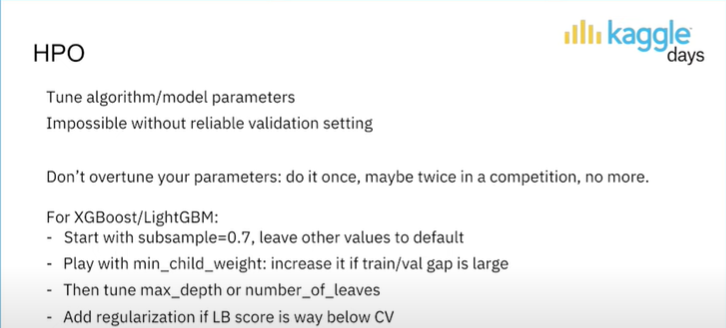

In [54]:
evallist = [(dtrain,'dtrain'),(dcv,'eval')]

In [91]:
param = {'num_parallel_tree' : 4, 'max_depth' : 10, 'min_child_weight': 10,
         'objective' : 'binary:logistic', 'eval_metric':'auc'}

iter = 20 mcw = 4

Try running for 25 iters

In [95]:
bst = xgb.train(param, dtrain, 35, evallist)

[0]	dtrain-auc:0.88025	eval-auc:0.86400
[1]	dtrain-auc:0.88577	eval-auc:0.86287
[2]	dtrain-auc:0.89093	eval-auc:0.86433
[3]	dtrain-auc:0.89232	eval-auc:0.86438
[4]	dtrain-auc:0.89547	eval-auc:0.86710
[5]	dtrain-auc:0.89812	eval-auc:0.86815
[6]	dtrain-auc:0.90146	eval-auc:0.86991
[7]	dtrain-auc:0.90459	eval-auc:0.87100
[8]	dtrain-auc:0.90668	eval-auc:0.87123
[9]	dtrain-auc:0.90861	eval-auc:0.87204
[10]	dtrain-auc:0.90993	eval-auc:0.87250
[11]	dtrain-auc:0.91037	eval-auc:0.87266
[12]	dtrain-auc:0.91140	eval-auc:0.87269
[13]	dtrain-auc:0.91228	eval-auc:0.87264
[14]	dtrain-auc:0.91398	eval-auc:0.87291
[15]	dtrain-auc:0.91513	eval-auc:0.87257
[16]	dtrain-auc:0.91664	eval-auc:0.87100
[17]	dtrain-auc:0.91719	eval-auc:0.87112
[18]	dtrain-auc:0.91796	eval-auc:0.87108
[19]	dtrain-auc:0.91831	eval-auc:0.87044
[20]	dtrain-auc:0.91889	eval-auc:0.87067
[21]	dtrain-auc:0.92039	eval-auc:0.87021
[22]	dtrain-auc:0.92134	eval-auc:0.87036
[23]	dtrain-auc:0.92250	eval-auc:0.86984
[24]	dtrain-auc:0.92409	ev

try setting monotonic_constariants: age

# achieves __ in kaggle, need 0.815

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

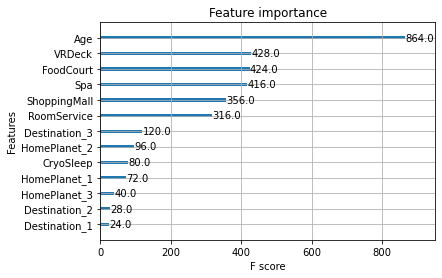

In [74]:
xgb.plot_importance(bst)

In [96]:
dtest = xgb.DMatrix(data = X_test)

In [97]:
k = bst.predict(dtest)

In [98]:
predictions = []
for i in k:
    if(i>=0.5):
        predictions.append(1)
    else:
        predictions.append(0)

In [99]:
pre = [bool(k) for k in predictions]

In [100]:
ss = pd.read_csv("sample_submission.csv")

In [101]:
submit = pd.DataFrame({ 'PassengerId':ss['PassengerId'], 'Transported':pre})

In [102]:
submit.to_csv("submit4.csv", index = False)